In [1]:
import torch
import torch.nn as nn
import torch.optim as opts
import torch.utils.data as data

In [2]:
from plasma.modules import *
from plasma.training import Trainer, metrics, callbacks
from tensorflow.keras.datasets import mnist

In [3]:
(xtr, ytr), (xt, yt) = mnist.load_data()

xtr.shape, ytr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
xtr = torch.tensor(xtr, dtype=torch.float) / 255
ytr = torch.tensor(ytr)
xt = torch.tensor(xt, dtype=torch.float) / 255
yt = torch.tensor(yt)

In [5]:
train = data.TensorDataset(xtr[:, None], ytr)
test = data.TensorDataset(xt[:, None], yt)

In [6]:
model = nn.Sequential(*[
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(inplace=True),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(inplace=True),
    
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(inplace=True),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True),
    
    nn.MaxPool2d(2, 2),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True),
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(inplace=True),
    
    GlobalAverage(),
    nn.Linear(128, 10)
])

In [7]:
opt = opts.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [8]:
loss = nn.CrossEntropyLoss()

In [9]:
trainer = Trainer(model, opt, loss, metrics=[metrics.acc_fn()])

In [10]:
cbs = [
    callbacks.LrFinder(1e-5, 1e-1, epochs=1)
]

epoch 1


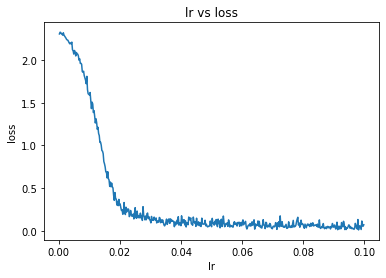

In [11]:
trainer.fit(train, test, batch_size=128, callbacks=cbs)